In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [7]:
mnist=tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
X_train_full.dtype

dtype('uint8')

![image.png](
)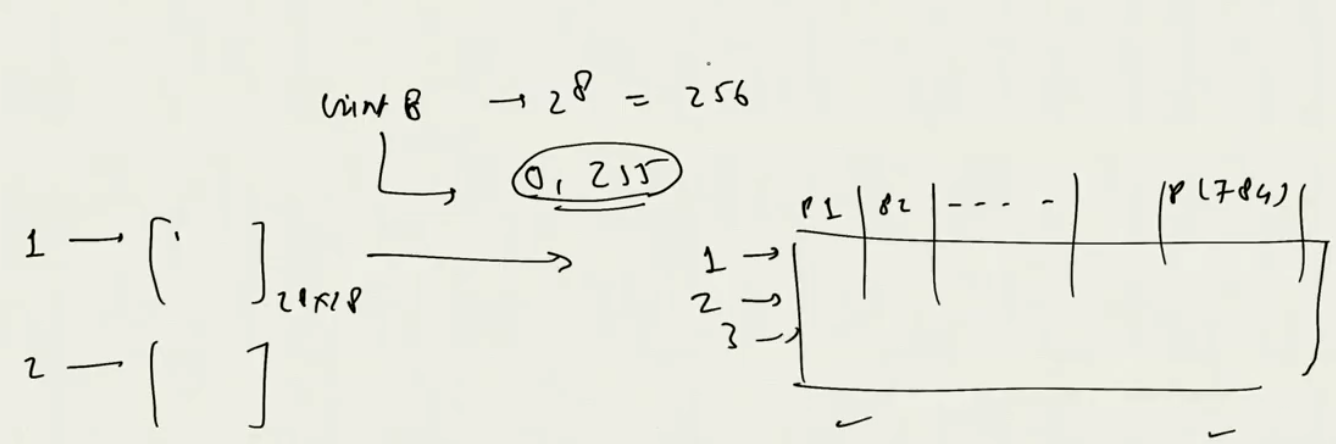

In [13]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]


(-0.5, 27.5, 27.5, -0.5)

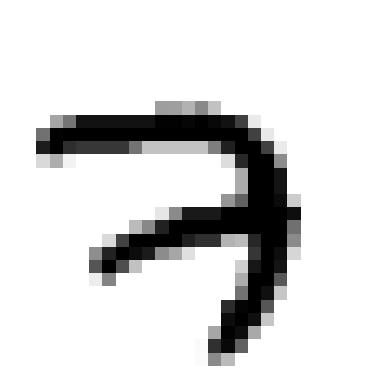

In [14]:
plt.imshow(X_train[0], cmap= "binary" )
plt.axis("off")


<Axes: >

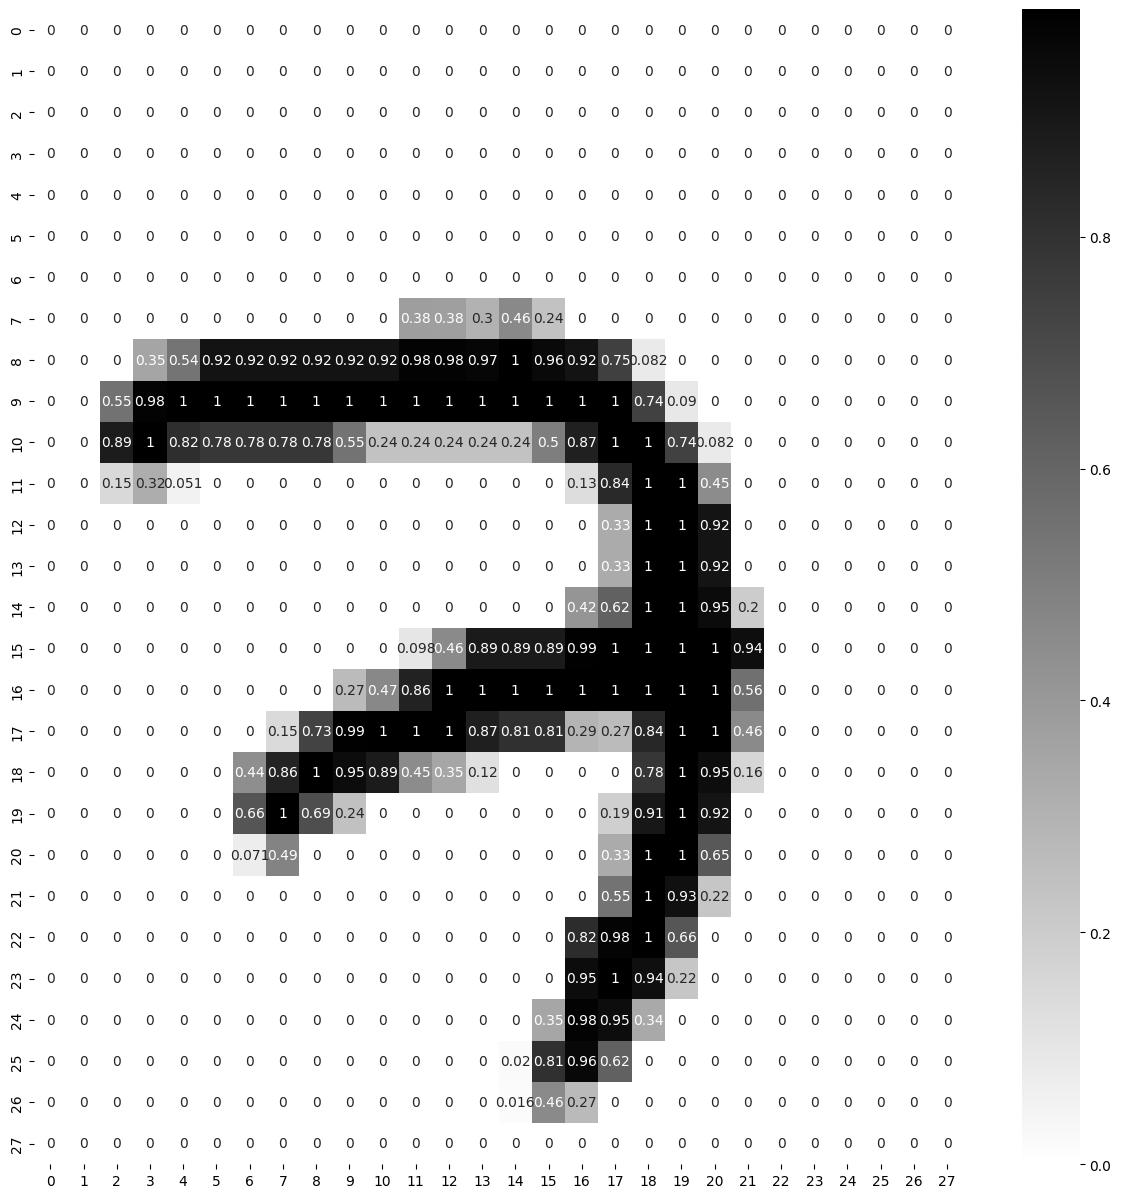

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

<Axes: >

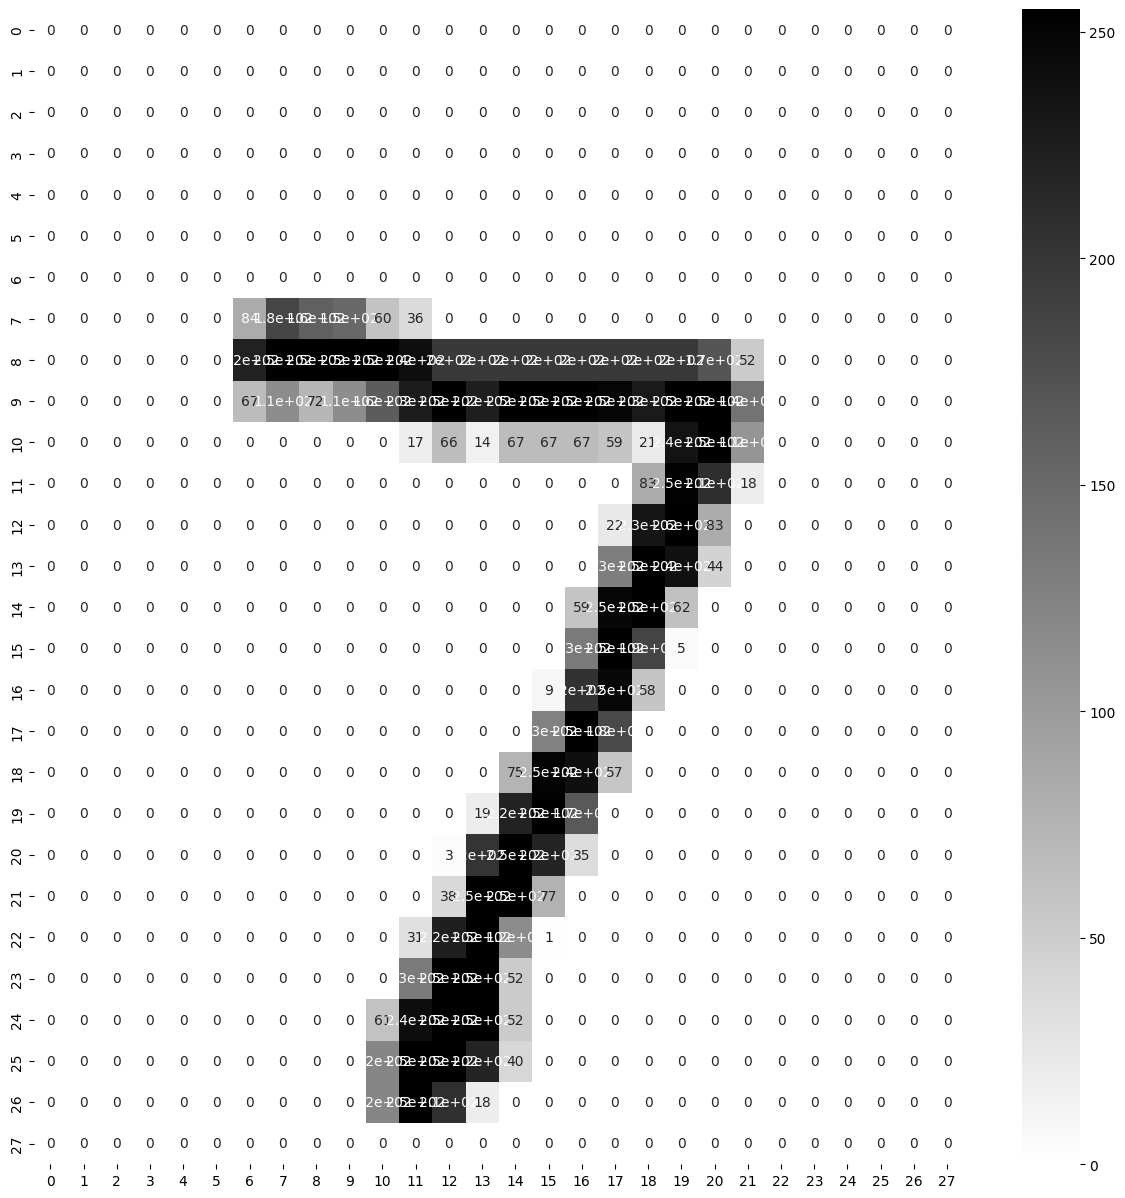

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0], annot=True, cmap="binary")

In [17]:
 LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputLayer"),
           tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
           tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
           tf.keras.layers.Dense(10, activation = 'softmax', name = "outputLayer")]
#dense because it is interconneted

flatten= (28x28) =784
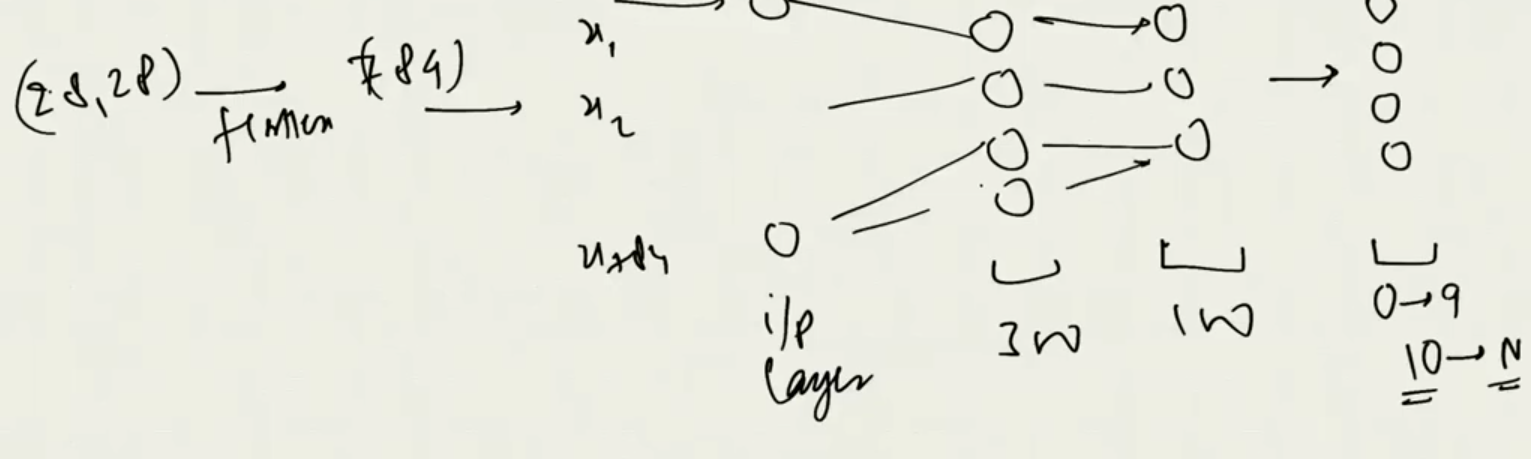

Softmax when multiclass outcome

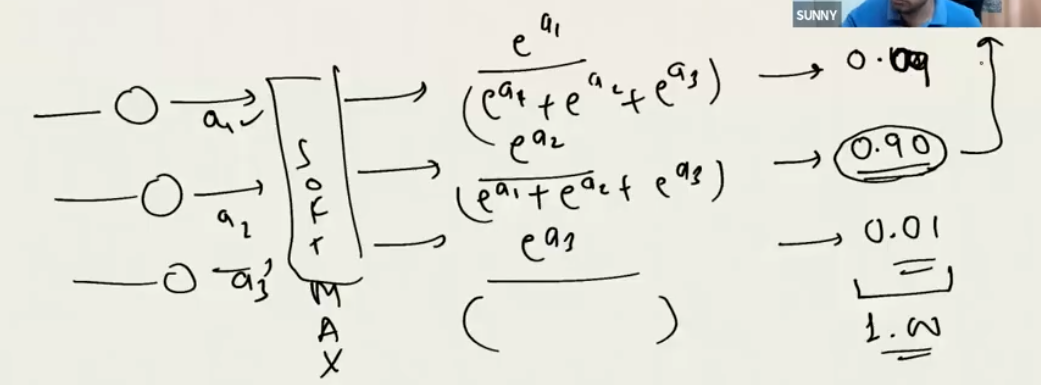

There are two types of models: Sequential and Functional(Mostly used in CNN)
In sequential we do not overpass or skipConnection in layers but in functional we can.
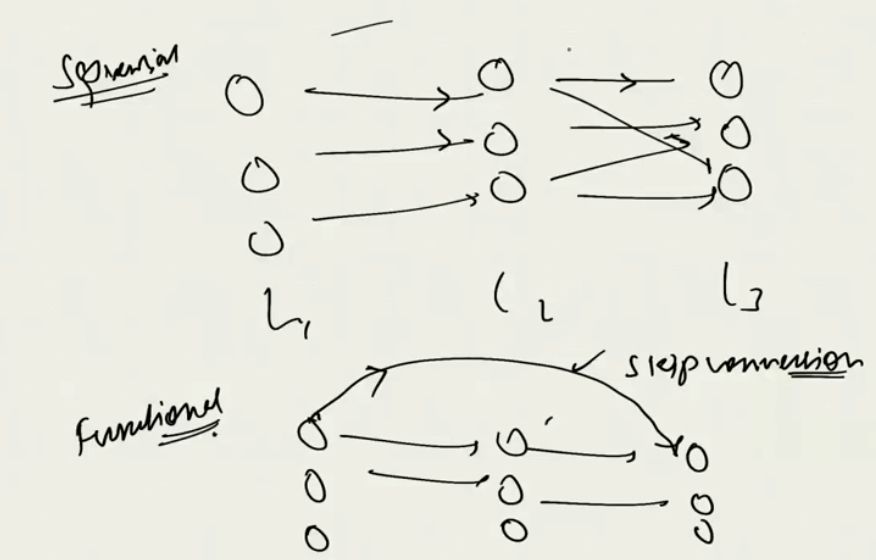

In [18]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.layers

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#hiddenLayer1
784 * 300 + 300 # +300 is bias

235500

In [22]:
#hiddenLayer2
300 * 100 + 100 # +100 is bias(for 100 neurons 100 bias)

30100

In [23]:
#outputLayer
100 * 10 + 10

1010

In [24]:
#total parameters
235500 + 30100 + 1010
# we are updating this number of parameters when we are updating a pass

266610

In [25]:
hidden_layer1=model_clf.layers[1]
hidden_layer1.name

'hiddenLayer1'

In [26]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights, shape must be the same

In [27]:
hidden_layer1.get_weights()

[array([[ 0.04574743, -0.0618345 , -0.00223549, ..., -0.03808793,
          0.06088032, -0.04303993],
        [-0.04107729, -0.01595646, -0.0312008 , ...,  0.03961207,
         -0.00402083, -0.07296079],
        [-0.05661605, -0.02566964, -0.06401091, ..., -0.04660077,
         -0.07146927, -0.05282471],
        ...,
        [-0.00251789, -0.00659814,  0.01430453, ..., -0.02014979,
         -0.00308385, -0.02719754],
        [ 0.00230165,  0.04476202,  0.04782888, ..., -0.00187292,
         -0.04383325,  0.05872363],
        [ 0.03872546,  0.07385904,  0.05451991, ...,  0.0597391 ,
         -0.0101146 ,  0.03817275]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [28]:
weights , biases = hidden_layer1.get_weights()

In [29]:
weights

array([[ 0.04574743, -0.0618345 , -0.00223549, ..., -0.03808793,
         0.06088032, -0.04303993],
       [-0.04107729, -0.01595646, -0.0312008 , ...,  0.03961207,
        -0.00402083, -0.07296079],
       [-0.05661605, -0.02566964, -0.06401091, ..., -0.04660077,
        -0.07146927, -0.05282471],
       ...,
       [-0.00251789, -0.00659814,  0.01430453, ..., -0.02014979,
        -0.00308385, -0.02719754],
       [ 0.00230165,  0.04476202,  0.04782888, ..., -0.00187292,
        -0.04383325,  0.05872363],
       [ 0.03872546,  0.07385904,  0.05451991, ...,  0.0597391 ,
        -0.0101146 ,  0.03817275]], dtype=float32)

In [30]:
print("shape: ",biases.shape)
biases

shape:  (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

#### Alternatively
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [32]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [33]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 15s 7ms/step - loss: 0.6102 - accuracy: 0.8411 - val_loss: 0.3092 - val_accuracy: 0.9180
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2892 - accuracy: 0.9179 - val_loss: 0.2418 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2352 - accuracy: 0.9333 - val_loss: 0.1994 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1995 - accuracy: 0.9425 - val_loss: 0.1773 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1740 - accuracy: 0.9507 - val_loss: 0.1597 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1540 - accuracy: 0.9561 - val_loss: 0.1409 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1379 - accuracy: 0.9607 - val_loss: 0.1344 - val_a

In [34]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [35]:
UNIQUE_PATH = model_clf.save(saveModel_path())
UNIQUE_PATH

your model will be saved at the following location
SAVED_MODELS/Model_2024_07_11_08_43_31_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.610248,0.841091,0.309223,0.9180
1,0.289206,0.917873,0.241806,0.9326
2,0.235228,0.933309,0.199441,0.9446
3,0.199475,0.942491,0.177263,0.9496
4,0.173972,0.950727,0.159674,0.9572
5,0.153963,0.956091,0.140871,0.9610
6,0.137864,0.960691,0.134402,0.9614
7,0.124566,0.964909,0.121597,0.9660
8,0.113116,0.968982,0.113902,0.9678
9,0.103580,0.971073,0.111659,0.9690


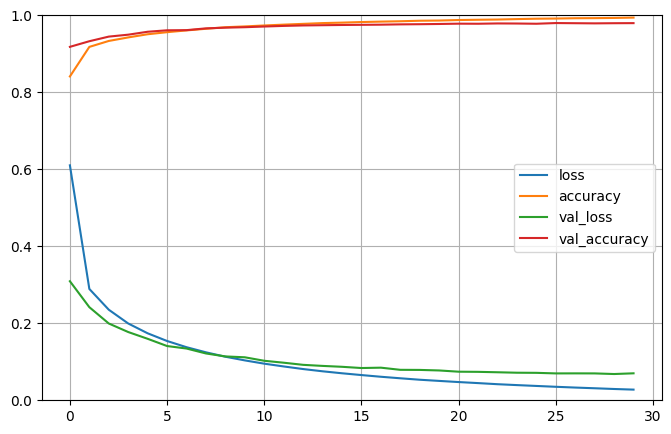

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 15.0203 - accuracy: 0.9721


[15.02029800415039, 0.972100019454956]

In [40]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 229ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 89ms/step


array([7, 2, 1])

In [41]:
y_test_new = y_test[:3]

Predicted: 7 ,Apredctual:7


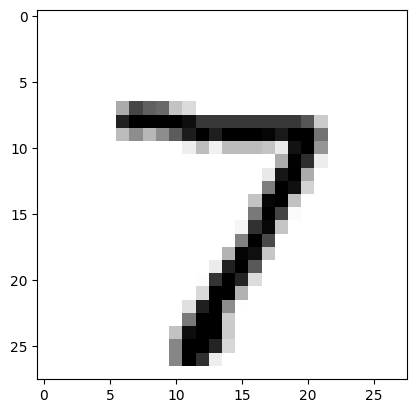

Predicted: 2 ,Apredctual:2


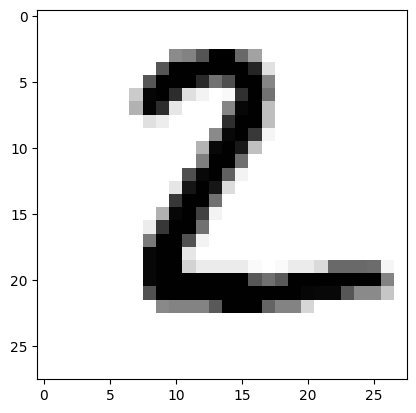

Predicted: 1 ,Apredctual:1


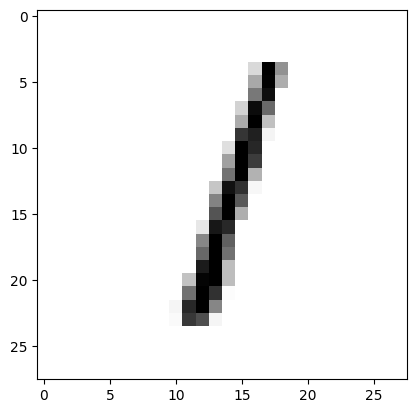

In [50]:
for data,actual,pred in zip(X_new, y_pred, y_test_new):
  plt.imshow(data, cmap="binary")
  print(f"Predicted: {pred} ,Apredctual:{actual}")
  plt.show()
  print("==="*20)

In [54]:
weights, biases = hidden_layer1.get_weights()

In [57]:
weights

array([[ 0.04574743, -0.0618345 , -0.00223549, ..., -0.03808793,
         0.06088032, -0.04303993],
       [-0.04107729, -0.01595646, -0.0312008 , ...,  0.03961207,
        -0.00402083, -0.07296079],
       [-0.05661605, -0.02566964, -0.06401091, ..., -0.04660077,
        -0.07146927, -0.05282471],
       ...,
       [-0.00251789, -0.00659814,  0.01430453, ..., -0.02014979,
        -0.00308385, -0.02719754],
       [ 0.00230165,  0.04476202,  0.04782888, ..., -0.00187292,
        -0.04383325,  0.05872363],
       [ 0.03872546,  0.07385904,  0.05451991, ...,  0.0597391 ,
        -0.0101146 ,  0.03817275]], dtype=float32)

array([[ 0.04574743, -0.0618345 , -0.00223549, ..., -0.03808793,
         0.06088032, -0.04303993],
       [-0.04107729, -0.01595646, -0.0312008 , ...,  0.03961207,
        -0.00402083, -0.07296079],
       [-0.05661605, -0.02566964, -0.06401091, ..., -0.04660077,
        -0.07146927, -0.05282471],
       ...,
       [-0.00251789, -0.00659814,  0.01430453, ..., -0.02014979,
        -0.00308385, -0.02719754],
       [ 0.00230165,  0.04476202,  0.04782888, ..., -0.00187292,
        -0.04383325,  0.05872363],
       [ 0.03872546,  0.07385904,  0.05451991, ...,  0.0597391 ,
        -0.0101146 ,  0.03817275]], dtype=float32)

In [56]:
biases

array([-1.02652730e-02, -4.71828990e-02, -3.23963426e-02,  8.24021250e-02,
       -3.38905379e-02,  4.13408093e-02,  1.25658168e-02,  3.96298207e-02,
        4.49877195e-02,  3.06644244e-04,  6.17771409e-02, -8.74475110e-03,
        2.49293316e-02, -3.54542024e-02,  1.70529203e-03,  3.53556033e-03,
        3.54560241e-02,  2.36069001e-02, -2.04606000e-02,  4.70189564e-02,
        1.20860180e-02, -4.40917269e-04, -5.07052392e-02,  1.06673099e-01,
       -6.92256773e-03,  2.32630465e-02,  8.25610664e-03, -1.68572192e-03,
        1.56906564e-02, -2.79386295e-03,  5.52997775e-02,  6.83151856e-02,
        1.61556639e-02,  1.03761079e-02, -2.47544814e-02,  2.06167791e-02,
       -4.61132973e-02,  1.17287440e-02,  5.52139897e-03,  4.90197465e-02,
        4.94486876e-02, -7.72072747e-03,  1.28015503e-02,  3.83570343e-02,
        2.05889456e-02,  2.40860768e-02,  5.70400283e-02,  2.38742493e-02,
        8.15726072e-03, -2.62566097e-02, -6.98135141e-03, -7.54682056e-04,
        1.53816538e-02,  

In [58]:
biases.shape

(300,)